In [4]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load TIFF file
tiff_file_path = "segmentation_imfill.tif"
tiff_stack = tifffile.imread(tiff_file_path)


volume made
fig made
subplot made


/var/folders/z_/bltb849n49bft69_743qx13r0000gn/T/ipykernel_1586/3245825040.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


voxels made


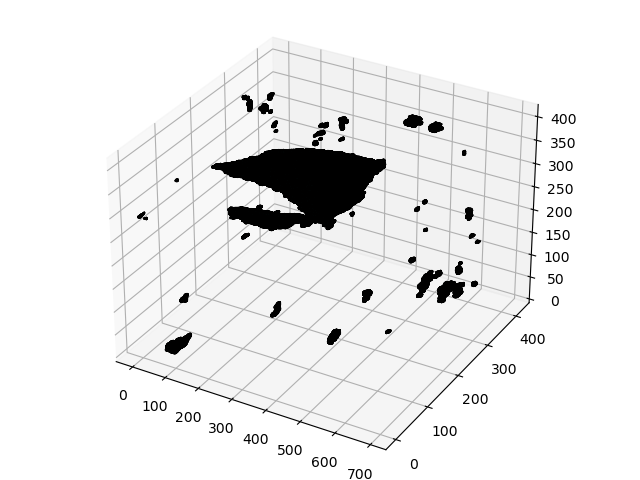

visual made


In [5]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

# Assemble 3D volume
volume = np.stack(tiff_stack, axis=-1)
print("volume made")
# Visualize 3D volume
fig = plt.figure()
print("fig made")

# ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)

print("subplot made")

ax.voxels(volume, facecolors='cyan', edgecolors='k')
print("voxels made")

plt.show()
print("visual made")



In [17]:
def rotate_shape(shape, angle, axis):
    rad_angle = np.radians(angle)

    if axis == 'z':
        rotation_matrix = np.array([
            [np.cos(rad_angle), -np.sin(rad_angle), 0],
            [np.sin(rad_angle), np.cos(rad_angle), 0],
            [0, 0, 1]
        ])
    else:
        # If no rotation, return the original shape
        return shape

    # Get the shape of the original array
    shape_size = shape.shape
    # Create a set of coordinates for each point in the shape
    coordinates = np.indices(shape_size).reshape(3, -1).T

    # Apply rotation to each point
    rotated_coordinates = np.dot(coordinates, rotation_matrix.T).astype(int)

    # Clip the rotated coordinates to stay within the shape bounds
    rotated_coordinates = np.clip(rotated_coordinates, 0, np.array(shape_size) - 1)

    # Create a new array with the rotated points
    rotated_shape = np.zeros_like(shape)
    rotated_shape[rotated_coordinates[:, 0], rotated_coordinates[:, 1], rotated_coordinates[:, 2]] = 1

    return rotated_shape

AttributeError: 'tuple' object has no attribute 'ndim'

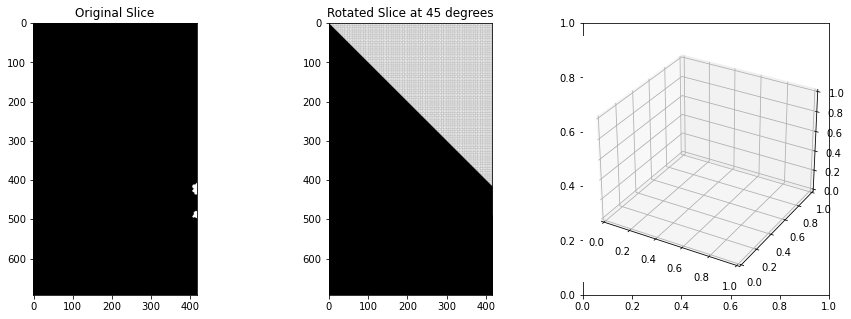

In [19]:
# Apply the rotation
angle_of_rotation = 45  # Angle in degrees
rotated_shape = rotate_shape(volume, angle_of_rotation, axis='z')

# Plot slices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot original slice
axes[0].imshow(volume[:, :, np.shape(volume)[0] // 2], cmap='gray')
axes[0].set_title('Original Slice')

# Plot rotated slice
axes[1].imshow(rotated_shape[:, :, np.shape(volume)[1] // 2], cmap='gray')
axes[1].set_title(f'Rotated Slice at {angle_of_rotation} degrees')

# Plot 3D representation of the original shape
ax = fig.add_subplot(133, projection='3d')
ax.voxels(np.shape(volume), facecolors='blue', edgecolor='k')
ax.set_title('Original 3D Shape')

plt.show()

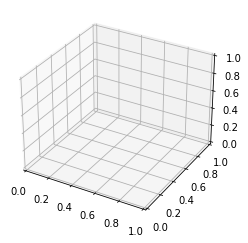

In [15]:
from matplotlib.animation import FuncAnimation
# Assuming 'volume' is your 3D volume
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update(frame):
    ax.cla()
    ax.voxels(volume, facecolors='cyan', edgecolors='k')
    ax.view_init(elev=10, azim=frame)

anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=50)
plt.show()

In [ ]:
# Extract slices along different axes
xy_slice = volume[:, :, z_index]
xz_slice = volume[:, y_index, :]
yz_slice = volume[x_index, :, :]

# Visualize 2D slices
plt.imshow(xy_slice, cmap='gray')
plt.show()
